In [131]:
# from https://www.freecodecamp.org/news/how-to-get-started-with-machine-learning-in-less-than-10-minutes-b5ea68462d23

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [132]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


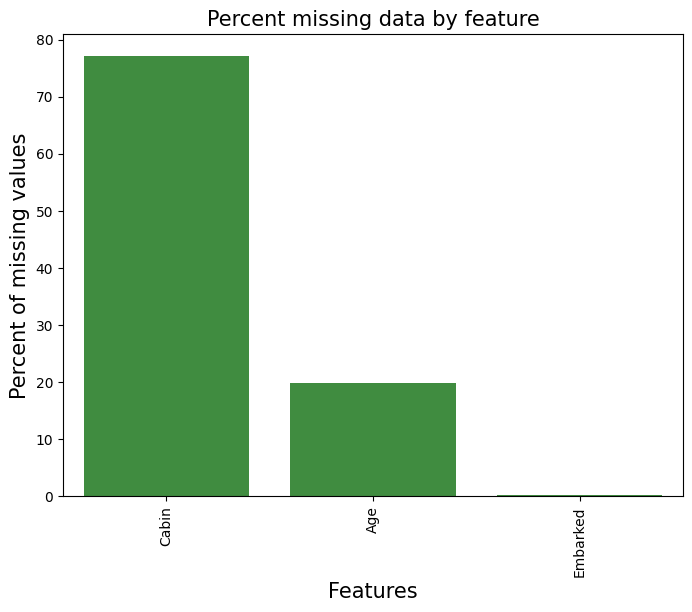

In [133]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
    ms = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms = ms[ms["Percent"] > 0]
    f, ax = plt.subplots(figsize=(8, 6))
    plt.xticks(rotation=90)
    fig = sns.barplot(x=ms.index, y=ms["Percent"], color="green", alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms

missingdata(train)

In [134]:
# Fill missing data
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
train['Age'].fillna(train['Age'].median(), inplace=True)

In [135]:
drop_column = ['Cabin']
train.drop(drop_column, axis=1, inplace=True)

In [136]:
# Check filling
print('Check the nan value in train data:\n')
print(train.isnull().sum())

Check the nan value in train data:

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [137]:
# Setting features
import re

# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

In [138]:
# Create a feature Family size instead of SibSp and Parch
dataset = train.copy()
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

# Create a new feature Title, containing the titles of passenger names
dataset['Title'] = dataset['Name'].apply(get_title)

# Check result
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Mr


In [139]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [140]:
# Title replacing
# Group all non-common titles into one single grouping "Rare"
dataset['Title'] = dataset['Title'].replace(
    ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

# Divide age to age_bin categories (0-14, 14-20, 20-40, 40-120)
dataset['Age_bin'] = pd.cut(dataset['Age'], 
                            bins=[0, 14, 20, 40, 120], 
                            labels=['Children', 'Teenage', 'Adult', 'Elder'])

# Divide fare to fare_bin categories
dataset['Fare_bin'] = pd.cut(dataset['Fare'], 
                             bins=[0, 7.91, 14.45, 31, 120], 
                             labels=['low_fare', 'median_fare', 'average_fare', 'high_fare'])
                                                                               
dataset.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Title,Age_bin,Fare_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Mr,Adult,low_fare
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Mrs,Adult,high_fare
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Miss,Adult,median_fare
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Mrs,Adult,high_fare
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Mr,Adult,median_fare
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,1,Mr,Adult,median_fare
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,Mr,Elder,high_fare
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,5,Master,Children,average_fare
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,3,Mrs,Adult,median_fare
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,2,Mrs,Children,average_fare


In [141]:
# Drop useless columns
drop_column = ['Age', 'Fare', 'Name', 'Ticket', 'SibSp', 'Parch', 'PassengerId']
dataset.drop(drop_column, axis=1, inplace=True)

# Create categorical features
dataset = pd.get_dummies(dataset, 
                         columns=["Sex", "Title", "Age_bin", "Embarked", "Fare_bin"],
                         prefix=["Sex", "Title", "Age_type", "Em_type", "Fare_type"])

# Check results
dataset.head(10)

,Survived,Pclass,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_low_fare,Fare_type_median_fare,Fare_type_average_fare,Fare_type_high_fare
0,0,3,2,0,1,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
1,1,1,2,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
2,1,3,1,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
3,1,1,2,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,0,3,1,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
5,0,3,1,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
6,0,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
7,0,3,5,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
8,1,3,3,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
9,1,2,2,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


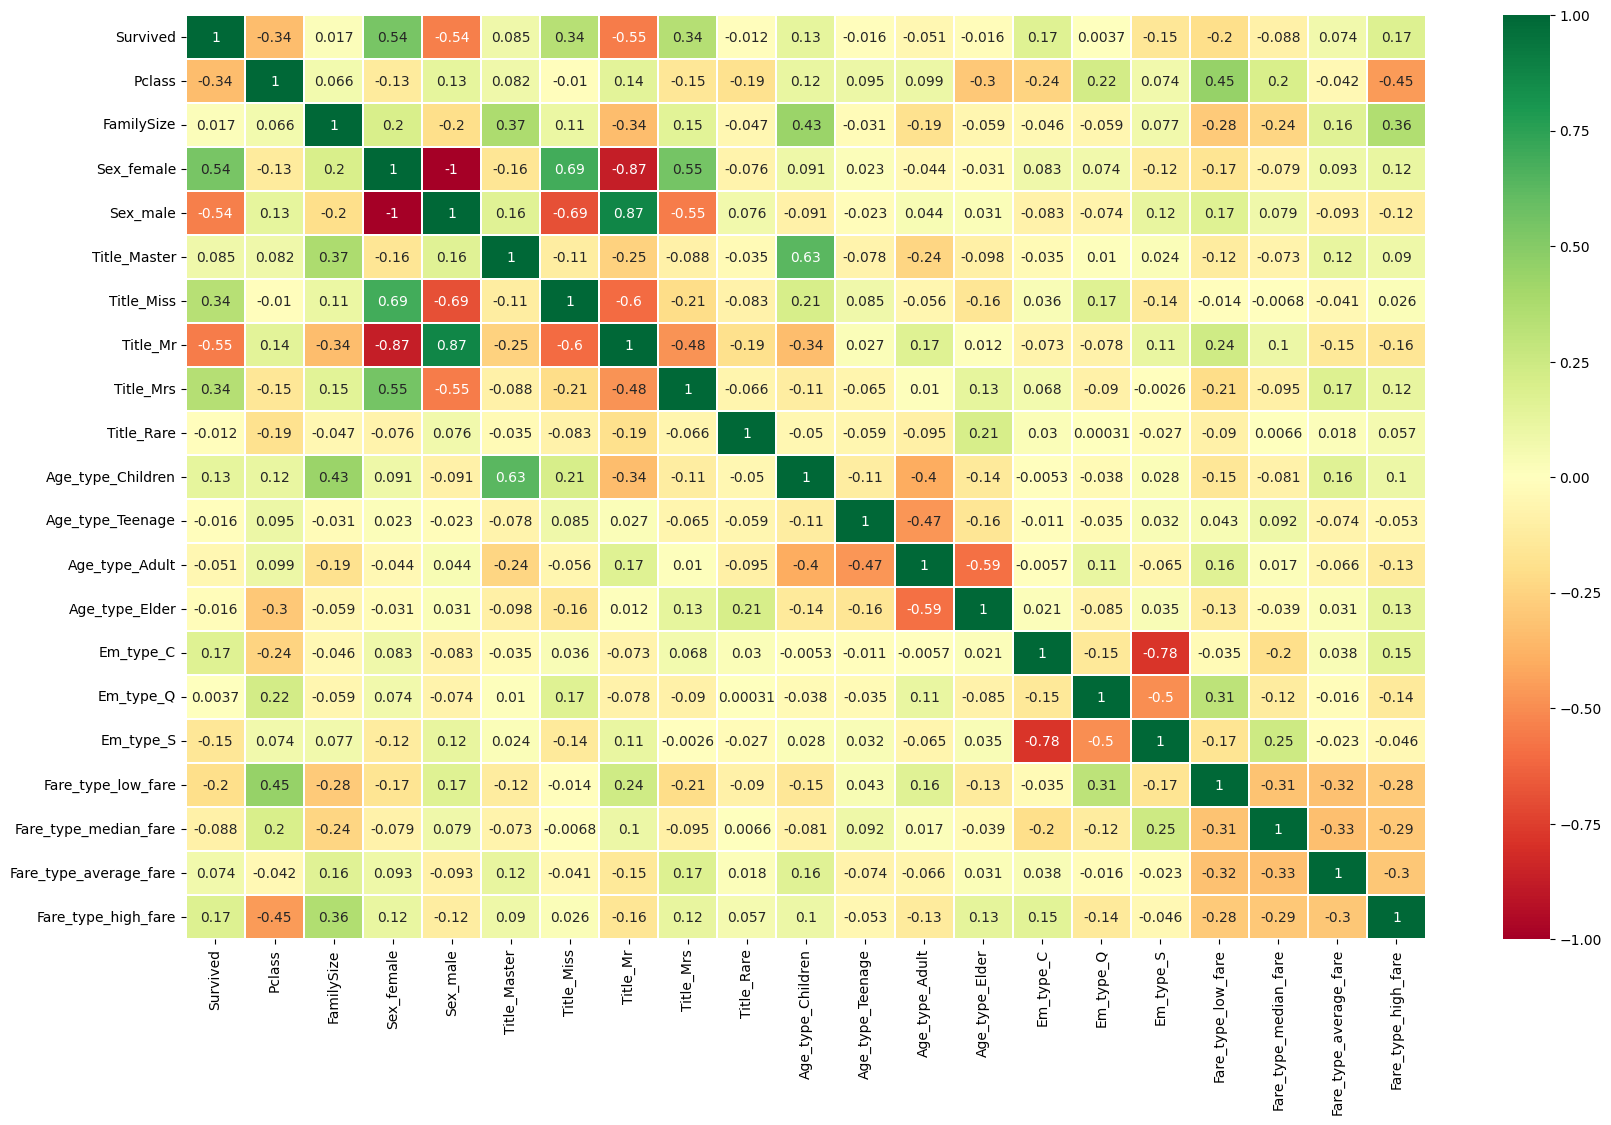

In [142]:
# try to find correlation
sns.heatmap(dataset.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) 
#data.corr()-->correlation matrix
fig = plt.gcf()
fig.set_size_inches(20, 12)
plt.show()

In [145]:
# start ML
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix

all_features = dataset.drop("Survived", axis=1)
target = dataset["Survived"]
X_train, X_test, y_train, y_test = train_test_split(all_features, target, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


,Pclass,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Age_type_Children,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_low_fare,Fare_type_median_fare,Fare_type_average_fare,Fare_type_high_fare
0,3,2,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0
1,1,2,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
2,3,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
3,1,2,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
4,3,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0


--------------The Accuracy of the model----------------------------
The accuracy of the Random Forest Classifier is 81.72
The cross validated score for Random Forest Classifier is:  83.17


Text(0.5, 1.05, 'Confusion_matrix')

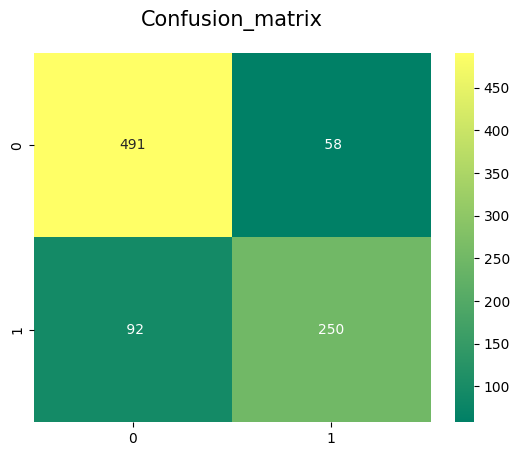

In [153]:
# try with Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10, min_samples_leaf=1,
                             oob_score=True, random_state=1, n_jobs=-1)
model.fit(X_train, y_train)
prediction_rm = model.predict(X_test)
print('--------------The Accuracy of the model--------------\n' \
    f'The accuracy of the Random Forest Classifier is {round(accuracy_score(prediction_rm, y_test)*100, 2)}')

kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
result_rm = cross_val_score(model, all_features, target, cv=10, scoring='accuracy')
print('The cross validated score for Random Forest Classifier is: ', round(result_rm.mean()*100, 2))

y_pred = cross_val_predict(model, all_features, target, cv=10)
sns.heatmap(confusion_matrix(target, y_pred), annot=True, fmt='3.0f', cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [160]:
# Random Forest Classifier Parameters tunning 
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()
n_estim = range(100, 1000, 100)

## Search grid for optimal parameters
param_grid = {"n_estimators": n_estim}
model_rf = GridSearchCV(model, param_grid=param_grid, cv=5, 
                        scoring="accuracy", n_jobs=4, verbose=1)
model_rf.fit(X_train, y_train)

# Best score
print(model_rf.best_score_)

#best estimator
model_rf.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8106709677419357


RandomForestClassifier(n_estimators=300)